In [74]:
from datetime import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

data_dir = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/bikes'

In [75]:
def get_colors(data):
    colors = list()
    for value in data:
        if value == min(data):
            colors.append('indianred')
        elif value == max(data):
            colors.append('springgreen')
        else:
            colors.append('lightgrey')
    return colors

def get_date_format(city, year, month):
    year = int(year)
    if city == 'Austin':
        return '%m/%d/%Y %I:%M:%S %p'
    elif city == 'Boston':
        if (year == 2018 and month < 3) or (year == 2023 and month > 2):
            return '%Y-%m-%d %H:%M:%S'
        else:
            return '%Y-%m-%d %H:%M:%S.%f'
    elif city == 'Chicago' or city == 'Columbus' or city == 'Washington':
        return '%Y-%m-%d %H:%M:%S'
    elif city == 'NYC':
        if year <= 2020 or (year == 2021 and month == 0):
            return '%Y-%m-%d %H:%M:%S.%f'
        return '%Y-%m-%d %H:%M:%S'
    elif city == 'Philly':
        if year == 2018 or (year == 2019 and month >= 0 and month <= 5) or (year == 2019 and month >= 9):
            return '%Y-%m-%d %H:%M:%S'
        return '%m/%d/%Y %H:%M'
    elif city == 'SanFrancisco':
        if year < 2020 or (year == 2020 and month < 4):
            return '%Y-%m-%d %H:%M:%S.%f'
        return '%Y-%m-%d %H:%M:%S'

In [76]:
def compare_trip_for_month(year_path):
    '''
    function to plot the number of trips for every month of a specific year
    '''
    
    months = [0] * 12
    months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    year_file = os.listdir(year_path)
    
    for file in year_file:
        
        full_path = os.path.join(year_path, file)
        df = pd.read_csv(full_path, dtype=object)
        month = int(file[4:6]) - 1
        months[month] = len(df.index)
    
    colors = get_colors(months)
    plt.barh(months_list, months, color=colors)
    
    for rect in plt.gca().patches:
        width = rect.get_width()
        plt.gca().text(width, rect.get_y() + rect.get_height()/2, str(int(width)), ha='left', va='center')
    
    plt.xlabel('Number of Trips')
    plt.ylabel('Months of the Year')
    title = 'Number of Trips for every month of ' + city + ' in ' + year
    plt.title(title)
    plt.show()
    
    return months

In [77]:
def compare_trip_for_hour(full_path, month_to_check, city, year):
    '''
    function to plot the number of trips for every hour of a specific year, month and city
    
    Inputs:
        - df: the dataframe to analyse
        - full_path: the path of the file
        - month_to_check: the month to check
    '''
    
    df = pd.read_csv(full_path, dtype=object)
    hours = [0] * 24
    
    for index in range(len(df.index)):
        date_format = get_date_format(city, year, month_to_check)
        if city == 'SanFrancisco':
            if len(df['stop_time'][index]) == 24:
                hour = datetime.strptime(df['stop_time'][index], date_format).hour
            else:
                hour = datetime.strptime(df['stop_time'][index], '%Y-%m-%d %H:%M:%S').hour
        else:
            hour = datetime.strptime(df['stop_time'][index], date_format).hour
        hours[hour] += 1
    
    colors = get_colors(hours)
    plt.barh(range(24), hours, color=colors)
    
    for rect in plt.gca().patches:
        width = rect.get_width()
        plt.gca().text(width, rect.get_y() + rect.get_height()/2, str(int(width)), ha='left', va='center')
    
    plt.xlabel('Number of Trips')
    plt.ylabel('Hours of the Day')
    
    months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    title = 'Number of Trips for every hour of ' + city + ' in ' + year + ' for the month of ' + months_list[int(month_to_check[5]) - 1]
    plt.title(title)
    plt.show()

def plot_trip_for_hour(city_to_analyse, year_to_analyse, month_to_analyse):
    '''
    function to plot the number of trips for every hour of a specific month of a specific year of a specific city
    
    Inputs:
        - city_to_analyse: the city to analyse
        - year_to_analyse: the year to analyse
        - month_to_analyse: the month to analyse
    '''
    
    # for each city in the data directory
    for city in os.listdir(data_dir):
        
        # if the city is the one to analyse
        if city == city_to_analyse:
            
            city_path = os.path.join(data_dir, city)
            
            # for each year in the city directory
            for year in os.listdir(city_path):
                
                # if the year is the one to analyse
                if int(year) == year_to_analyse:
                    
                    year_path = os.path.join(city_path, year)
                    
                    # for each month in the year directory
                    for month_file in os.listdir(year_path):
                        
                        full_path = os.path.join(year_path, month_file)
                        df = pd.read_csv(full_path, dtype=object)
                        
                        month = int(month_file[4:6]) - 1
                        # if the month is the one to analyse
                        if month == month_to_analyse:
                            compare_trip_for_hour(full_path, month)

In [78]:
def compare_gender_per_hour(full_path, month_to_check, city, year):
    '''
    function to calculate the number of men and women for every hour of the day
    
    Inputs:
        - df: the dataframe to analyse
        - full_path: the path of the file
        - month_to_check: the month to check
    '''
    
    df = pd.read_csv(full_path, dtype=object)
    months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    hours = {
        'men' : [0 for _ in range(24)],
        'women' : [0 for _ in range(24)]
    }
    
    is_zero = True
    
    for index in range(len(df.index)):
        date_format = get_date_format(city, year, month_to_check)
        if city == 'SanFrancisco':
            if len(df['stop_time'][index]) == 24:
                hour = datetime.strptime(df['stop_time'][index], date_format).hour
            else:
                hour = datetime.strptime(df['stop_time'][index], '%Y-%m-%d %H:%M:%S').hour
        else:
            hour = datetime.strptime(df['stop_time'][index], date_format).hour
        if df['gender'][index] == 'man' or df['gender'][index] == 'Male' or df['gender'][index] == 1 or df['gender'][index] == '1':
            is_zero = False
            hours['men'][hour] += 1
        if df['gender'][index] == 'woman' or df['gender'][index] == 'Female' or df['gender'][index] == 2 or df['gender'][index] == '2':
            is_zero = False
            hours['women'][hour] += 1
    
    if not is_zero:
        x = np.arange(len(hours['men']))
        width = 0.24
        
        _ = plt.subplots(layout='constrained')
        
        plt.bar(x - 0.12, hours['men'], width, color='lightskyblue', label='men')
        plt.bar(x + 0.12, hours['women'], width, color='salmon', label='women')
        
        plt.legend(loc='upper right', ncol=2)
        title = 'Number of Trips for every hour of ' + city + ' in ' + year + ' for the month of ' + months_list[int(month_to_check[5]) - 1]
        plt.title(title)
        plt.xlabel('Hours of the Day')
        plt.ylabel('Number of Trips')
        plt.show()

def plot_gender_per_hour(city_to_analyse, year_to_analyse, month_to_analyse):
    '''
    function to plot the number of men and women for every hour of the day
    
    Inputs:
        - city_to_analyse: the city to analyse
        - year_to_analyse: the year to analyse
        - month_to_analyse: the month to analyse
    '''
    for city in os.listdir(data_dir):
        
        if city == city_to_analyse:
            
            city_path = os.path.join(data_dir, city)
            
            for year in os.listdir(city_path):
                
                if year == year_to_analyse:
                    
                    year_path = os.path.join(city_path, year)
                    
                    for month_file in os.listdir(year_path):
                        
                        month = int(month_file[4:6]) - 1
                        if month == month_to_analyse:
                            full_path = os.path.join(year_path, month_file)
                            
                            compare_gender_per_hour(full_path, month)

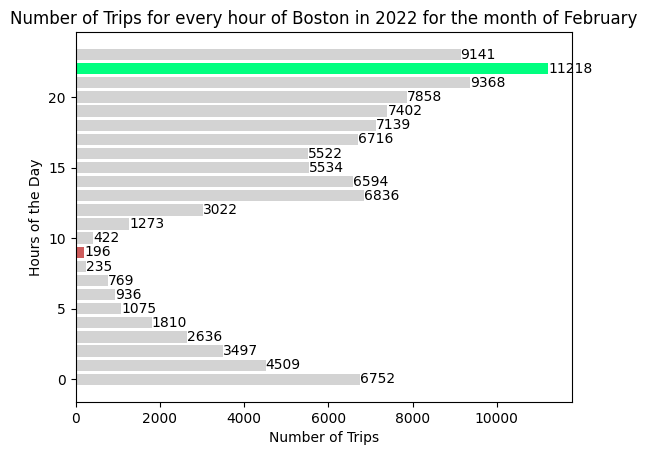

In [80]:
city = 'Boston'
year = '2022'
month = '202202-bluebikes-tripdata.csv'

city_path = os.path.join(data_dir, city)
year_path = os.path.join(city_path, year)
path = os.path.join(year_path, month)

compare_trip_for_hour(path, month, city, year)

In [81]:
compare_gender_per_hour(path, month, city, year)

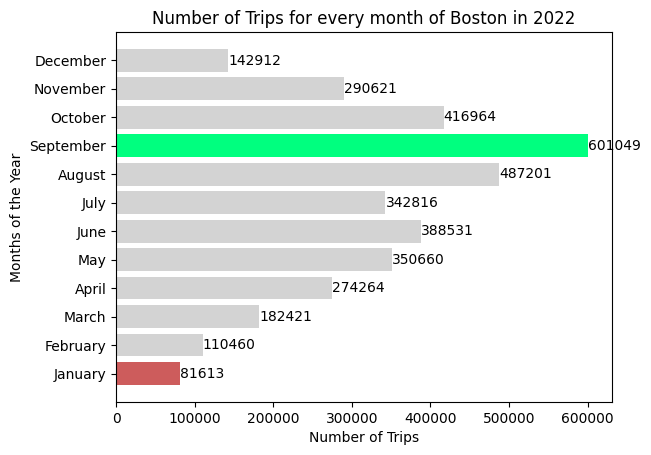

[81613,
 110460,
 182421,
 274264,
 350660,
 388531,
 342816,
 487201,
 601049,
 416964,
 290621,
 142912]

In [82]:
compare_trip_for_month(year_path)